#**Springboard - Capstone Project  **
#**AMES Housing data - IOWA market **
#**GOAL: To predict the sale price of the houses in IOWA neighborhoods as accurately as possible**
- Demonstrate the use creative feature engineering and
- Use Advanced Regression techniques

In [2]:
# AMES- IOWA Housing data - Basic data wrangling steps
# Check for Columns that contain data that can be used as features
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


df1 = pd.read_csv('train.csv', header=0)
df1.head(10)

%matplotlib inline

#Data Wrangling
##Steps to find Missing Values
- Listed the information of the Training set to check which data would be missing a high % ( Alley, PoolQC, Fence, MiscFeature, FireplaceQu are features that are missing a high volume of data)
-Lisiting all columns that have less 90% of missing data
-Find the percentage of Non-null data

In [11]:
# Get details of the rows for each variables to check for missing data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### We see that missing more than 90 % of data  the following columns 'PoolQC', 'MiscFeature', 'Alley', 'FirePlaceQC' are being excluded from our analysis. Other variables with Basement and Garage seem to have less missing values, we need to check if these variables have NaN since the houses have that particular feature missing. In that case we need to have that value NaN as 'None'.

### We can group all variables with the  NaN values. Variables with similar categories have been grouped for comparison e.g. Basement, MasVnr, Garage etc. Non-categorical variables have also been included (e.g Pool Area, MasVnrArea) to help decide if the NaN in categorical variable of the same category need to be set to None or dropped. If PoolQC is NaN and PoolArea is 0  we can see that NaN  will be that there is no pool and should be set to None.

In [12]:
#Find all the columns or features that have missing data
frac = df1.shape[0]* .90 # Any columns with data below 1314 is considered to have insufficent data for analysis
percent_missing = (100*(df1.isnull().sum())/df1.shape[0]).round(1) 
percent_missing.sort_values(ascending = False).head(20)

PoolQC          99.5
MiscFeature     96.3
Alley           93.8
Fence           80.8
FireplaceQu     47.3
LotFrontage     17.7
GarageCond       5.5
GarageType       5.5
GarageYrBlt      5.5
GarageFinish     5.5
GarageQual       5.5
BsmtExposure     2.6
BsmtFinType2     2.6
BsmtFinType1     2.5
BsmtCond         2.5
BsmtQual         2.5
MasVnrArea       0.5
MasVnrType       0.5
Electrical       0.1
Utilities        0.0
dtype: float64

In [15]:
df1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#Categorical Variables
###The table below shows we can check for the  NaN values  and for Garage columns : Where there are NaN values, they are in all garage variables suggesting the absense of garages for those houses. So for Pool - PoolQC is set to NaN corresponding to PoolArea 0, which means the absence of Pool. This should be set to 'None' Basement, Alley, Fence, Miscfeatures has NaN values and means absence of this feature in the house and should be set to 'None'.  In case of the Electrical variable, when we find NaN value setting it to 'None' does not make sense as it is a feature that all houses should have. Since it is a small portion say 0.1% we can remove the rows with that value.

In [13]:
Categories = ['BsmtFinType1','BsmtFinType2','BsmtCond', 'BsmtQual','MasVnrType', 'GarageCond','GarageFinish','GarageQual','GarageType','GarageYrBlt','MiscFeature','FireplaceQu','Fence','PoolQC','Alley'] 
df1[Categories] = df1[Categories].replace(np.nan, 'None', inplace = True)
df1.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


#CORRELATION OF VARIABLES
### We need to get the SalePrice correlation to all the relevant variables so that we can determine which features to be included. We will need to calculate the correlation of sales price to all the variables and eliminate out variables which correlate less than abs 0.5. Once we have these features we will then create a correltion matrix to determine. Once we have this, then similar features can either be merged into one compound feature or just one of the features included in subsequent analysis

In [19]:
corr1 = df1.corr()['SalePrice'] #array of correlation values for each variable vs. SalePrice 
corr =corr1[np.abs(corr1) > 0.5]  # just return correlation values greater than abs(0.5)
corr = pd.DataFrame(data=corr,columns= ['SalePrice'])
corr = corr.drop_duplicates().sort_values('SalePrice',ascending =False)
print(corr)

              SalePrice
SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
FullBath       0.560664
TotRmsAbvGrd   0.533723
YearBuilt      0.522897
YearRemodAdd   0.507101


###We see that the OverallQual and GroundFloor Living Area has a good correlation to the Sales Price. So we can make below a heatmap to show the correlation matrix for all the variables which are above 50%


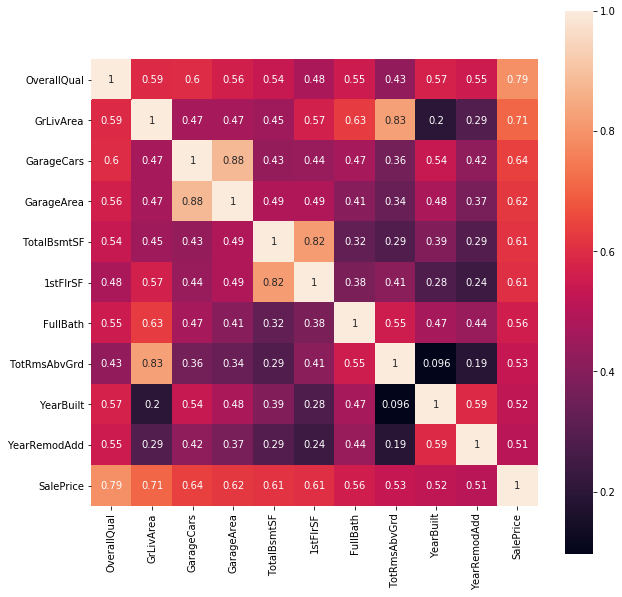

In [3]:
corr_var = ['OverallQual','GrLivArea', 'GarageCars', 'GarageArea','TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt','YearRemodAdd','SalePrice']
df1 = df1[corr_var]
df1
corr_matrix = df1.corr()
f,ax = plt.subplots(figsize =(10,10))
sns.heatmap(corr_matrix, annot=True, vmax=1,square=True)

In [27]:
labels_to_drop = ['GarageArea','TotRmsAbvGrd','1stFlrSF']
df1= df1.drop(labels_to_drop, axis =1)
df1.head(10)

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,SalePrice
0,7,1710,2,856,2,2003,2003,208500
1,6,1262,2,1262,2,1976,1976,181500
2,7,1786,2,920,2,2001,2002,223500
3,7,1717,3,756,1,1915,1970,140000
4,8,2198,3,1145,2,2000,2000,250000
5,5,1362,2,796,1,1993,1995,143000
6,8,1694,2,1686,2,2004,2005,307000
7,7,2090,2,1107,2,1973,1973,200000
8,7,1774,2,952,2,1931,1950,129900
9,5,1077,1,991,1,1939,1950,118000


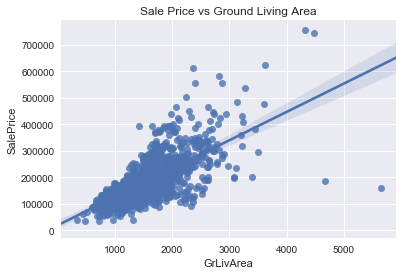

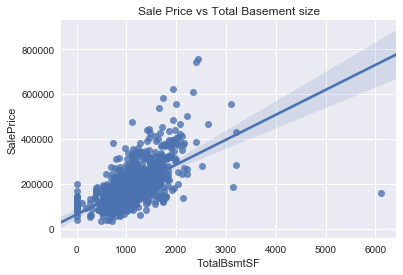

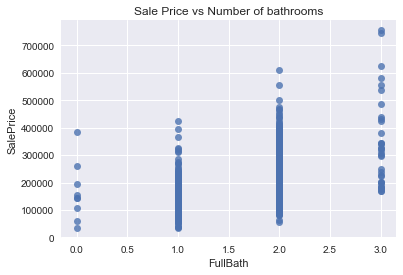

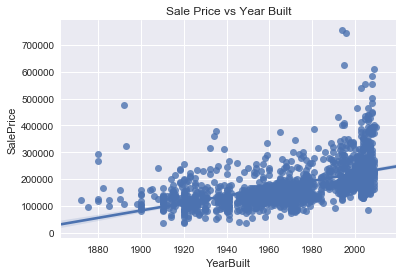

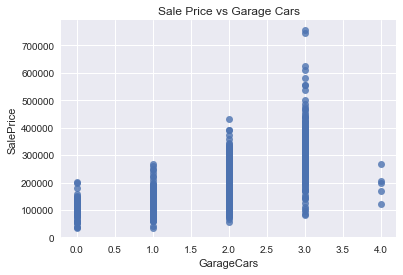

In [29]:
plt.figure(1)
sns.set(color_codes=True)
ax = sns.regplot(x="GrLivArea", y="SalePrice", data=df1)
plt.title('Sale Price vs Ground Living Area')

plt.figure(2)
sns.set(color_codes=True)
ax = sns.regplot(x="TotalBsmtSF", y="SalePrice", data=df1)
plt.title('Sale Price vs Total Basement size')

plt.figure(3)
sns.set(color_codes=True)
ax = sns.regplot(x="FullBath", y="SalePrice", data=df1, fit_reg = False)
plt.title('Sale Price vs Number of bathrooms')

plt.figure(4)
sns.set(color_codes=True)
ax = sns.regplot(x="YearBuilt", y="SalePrice", data=df1)
plt.title('Sale Price vs Year Built')


plt.figure(5)
sns.set(color_codes=True)
ax = sns.regplot(x="GarageCars", y="SalePrice", data=df1, fit_reg = False)
plt.title('Sale Price vs Garage Cars')

##Four outliers in the graphs above will be dropped. These corresponding to ground living area > 4500 and sales price between 7000 and 8000 in Year Built graph.The isolated TotalBsmtSF point > 6000 is also included as part of these outliers which will be removed

In [31]:
df1 =df1.drop(df1[df1.GrLivArea == 5642].index)
df1 =df1.drop(df1[df1.GrLivArea == 4476].index)
df1 =df1.drop(df1[df1.SalePrice == 755000].index)
df1 =df1.drop(df1[df1.SalePrice == 745000].index)

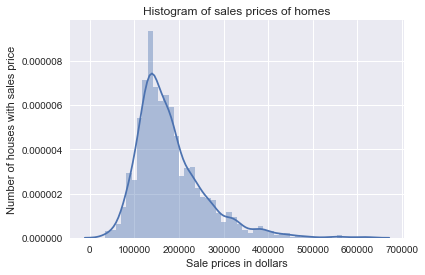

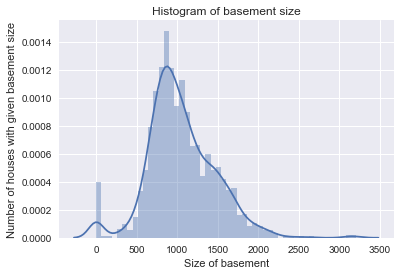

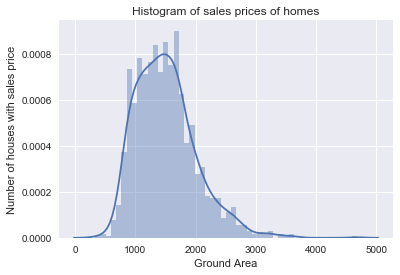

In [32]:
#HISTOGRAM FOR normal distribution
plt.figure(1)
sns.distplot(df1['SalePrice'], 50)
plt.xlabel("Sale prices in dollars")
plt.ylabel("Number of houses with sales price") 
plt.title("Histogram of sales prices of homes")
plt.grid(True) 
plt.show()


plt.figure(2)
sns.distplot(df1['TotalBsmtSF'], 50)
plt.xlabel("Size of basement")
plt.ylabel("Number of houses with given basement size") 
plt.title("Histogram of basement size")
plt.grid(True) 
plt.show()

plt.figure(3)
sns.distplot(df1['GrLivArea'], 50)
plt.xlabel("Ground Area")
plt.ylabel("Number of houses with sales price") 
plt.title("Histogram of sales prices of homes")
plt.grid(True) 
plt.show()

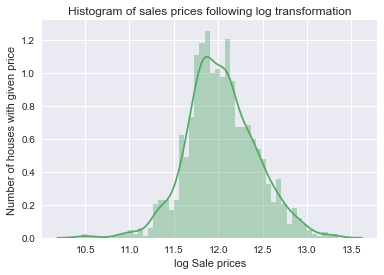

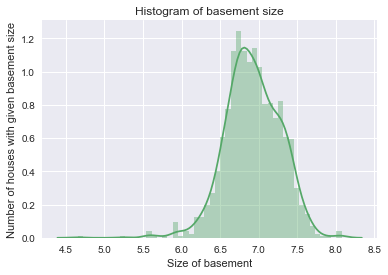

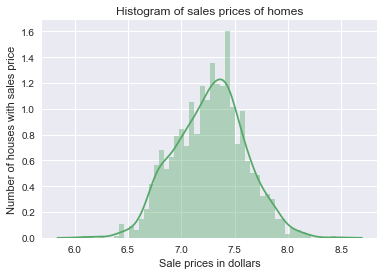

In [35]:
# We see that there are zero values for basement size so we can go ahead and remove them
# Removing zero values in TotalBsmtSF to perform log transormation afterwards 
df1_new = df1.drop(df1[df1['TotalBsmtSF']==0].index, axis =0)

df1_new.loc[:,['SalePrice','TotalBsmtSF','GrLivArea','YearBuilt']] = np.log(df1_new[['SalePrice','TotalBsmtSF','GrLivArea','YearBuilt']])
plt.figure(1)
sns.distplot(df1_new['SalePrice'], 50, color = "g")
plt.xlabel("log Sale prices")
plt.ylabel("Number of houses with given price") 
plt.title("Histogram of sales prices following log transformation")
plt.grid(True) 
plt.show()

plt.figure(2)
sns.distplot(df1_new['TotalBsmtSF'], 50, color ="g")
plt.xlabel("Size of basement")
plt.ylabel("Number of houses with given basement size") 
plt.title("Histogram of basement size")
plt.grid(True) 
plt.show()

plt.figure(3)
sns.distplot(df1_new['GrLivArea'], 50, color ="g")
plt.xlabel("Sale prices in dollars")
plt.ylabel("Number of houses with sales price") 
plt.title("Histogram of sales prices of homes")
plt.grid(True) 
plt.show()


#Scatter Plots after the transformation